In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.duplicated().sum()

0

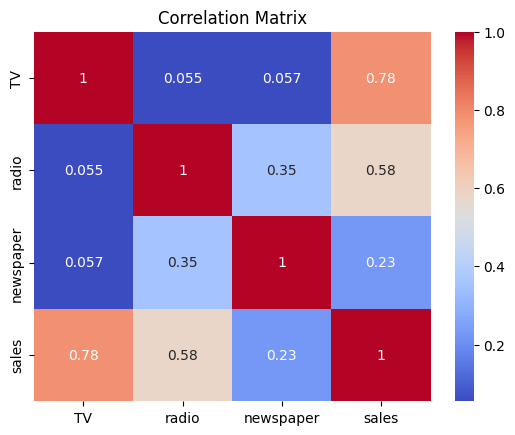

In [7]:
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

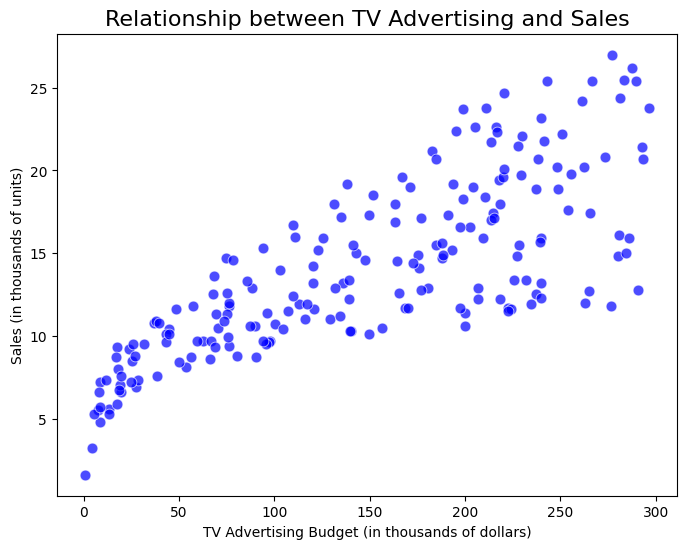

In [8]:
# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='sales', data=df, color='blue', s=60, alpha=0.7)

# Add labels and title
plt.title('Relationship between TV Advertising and Sales', fontsize=16)
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')

# Show plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('sales',axis=1), df['sales'], test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [11]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

        TV  radio  newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8
        TV  radio  newspaper
37    74.7   49.4       45.7
109  255.4   26.9        5.5
31   112.9   17.4       38.6
89   109.8   47.8       51.4
66    31.5   24.6        2.2
85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64
37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64


In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R²:", r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R²: 0.9185780903322446
MSE: 2.2987166978863782


In [15]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [16]:
y_pred=ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R²: 0.9185777102321784
MSE: 2.2987274289337387


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
y_pred=model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R²: 0.9786420403678666
MSE: 0.6029814166666639


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train,y_train, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.9633158534630685


In [20]:
import pickle
with open('advertising_model.pkl', 'wb') as f:
    pickle.dump(model, f)